## Random Variables, Expectation, and Variance: Yahtzee Case study

In [191]:
#Import necessary packages
import pandas as pd
import numpy as np
from scipy.stats import binom, norm 
from scipy.special import erf
import matplotlib.pyplot as plt

In [192]:
#read in .csv into DataFrame
df = pd.read_csv('Yahtzee.csv')
df.head(6)

,Die1,Die2,Die3,Die4,Die5
0,4,6,1,1,3
1,5,5,3,1,2
2,1,4,6,1,6
3,5,6,4,1,3
4,6,4,4,6,6
5,2,2,2,1,6


### 1.	What distribution should the individual rolls of a die follow?

The distribution for individual rolls of a die should follow a multinoulli distribution/Categorical distribution because of the inherent randomness present in each roll making the probability of each side differ significantly enough to not be uniform like the M&M example in class. If randomness (force of roll, gravity, moisture levels, obstacles, etc.) were not present then rolls would display a discrete uniform distribution because each side would have a 1/6 probability of occurring, again however this is not the case and can be seen in the visualizations presented below in question 2. I believe that the higher the number of rolls the closer the distributions get to being closer to Gaussian distribution. 

### 2.	Does the data back up that assumption from #1?  To test that, either provide a histogram or provide counts for the individual numbers 1-6.

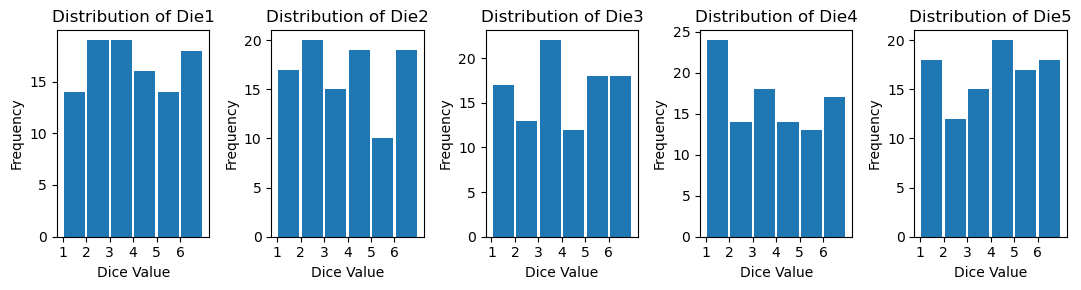

In [193]:
#Create subplots for each die
fig, axes = plt.subplots(1, 5, figsize=(11, 3))

#Loop through the columns (dice)
for i, die_column in enumerate(df.columns):
    ax = axes[i]
    ax.hist(df[die_column], bins=range(1, 8), rwidth=0.9)
    ax.set_title(f'Distribution of {die_column}')
    ax.set_xlabel("Dice Value")
    ax.set_ylabel("Frequency")
    ax.set_xticks(range(1, 7))

plt.tight_layout()
plt.show()

### 3.	Now consider the follow scenarios.  What distribution should they follow?  Again, confirm with a histogram.
* The die roll is odd within a given Yahtzee roll (all five die are rolled)
    * When considering the whether a roll is odd and all 5 die are rolled I would expected the distribution to be skewed with in either direction. When looking at the distributions above from question 2 I would expect the distribution of odd rolls to be positively skewed with a higher frequency of lower counts in odd rolls.
* The die roll is composite within a given Yahtzee roll (all five die are rolled)
    * For all 5 die being rolled together I would expect the distribution to become more normally distributed but seems to be more similar in scenario and in vizualization to the binomial distribution from the lecture. 


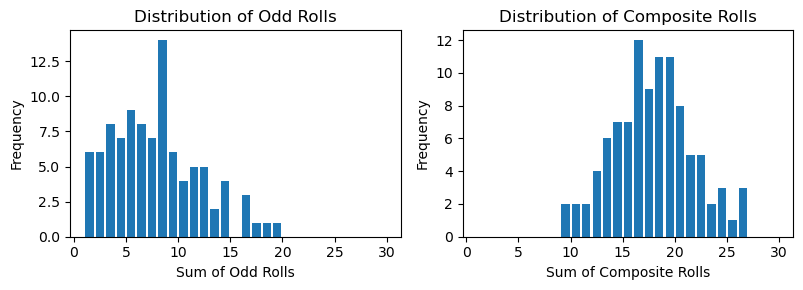

In [194]:
#Calculate the sum of odd rolls and composite rolls for each Yahtzee roll
odd_rolls = df[df % 2 != 0].sum(axis=1)
composite_rolls = df.sum(axis=1)

#Create histograms for both
plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
plt.hist(odd_rolls, bins=range(1, 31), rwidth=0.8)
plt.title("Distribution of Odd Rolls")
plt.xlabel("Sum of Odd Rolls")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(composite_rolls, bins=range(1, 31), rwidth=0.8)
plt.title("Distribution of Composite Rolls")
plt.xlabel("Sum of Composite Rolls")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### 4.	What is the relative expected frequency ratio between two die being rolled odd and four die being rolled even?  Calculate this from both the distribution this should have and the actual data (note, you may get different answers - that shouldn't be alarming if you do, but it's possible they could be the same).

In [195]:
#Count occurrences of two odd rolls and four even rolls
two_odd_rolls_count = ((df % 2 != 0).sum(axis=1) == 2).sum()
four_even_rolls_count = ((df % 2 == 0).sum(axis=1) == 4).sum()

#Calculate total frequency (n)
total_frequency = len(df)

#Calculate relative observed frequency ratio
relative_observed_frequency_ratio_odd = two_odd_rolls_count / total_frequency
relative_observed_frequency_ratio_even = four_even_rolls_count / total_frequency

#Define params for binom distribution
n = 6  #Total number of rolls (6 rolls in total to test)
p_odd = 0.5  #Probability of rolling odd (success)
p_even = 0.5  #Probability of rolling even (success)

#Calculate expected frequencies based on binom distribution
#Expected frequency of exactly 2 odd rolls in 6 roll test
expected_frequency_two_odd_rolls = binom.pmf(2, n, p_odd) * total_frequency

#Expected frequency of exactly 4 even rolls in 6 roll test
expected_frequency_four_even_rolls = binom.pmf(4, n, p_even) * total_frequency

print("Relative Observed Frequency Ratio 2 odd rolls:", relative_observed_frequency_ratio_odd)
print("Relative Observed Frequency Ratio 4 even rolls:", relative_observed_frequency_ratio_even)
print("Expected Frequency 2 odd rolls:", expected_frequency_two_odd_rolls)
print("Expected Frequency 4 even rolls:", expected_frequency_four_even_rolls)


Relative Observed Frequency Ratio 2 odd rolls: 0.32
Relative Observed Frequency Ratio 4 even rolls: 0.16
Expected Frequency 2 odd rolls: 23.437500000000004
Expected Frequency 4 even rolls: 23.4375


### 5.	Now consider the sum of the dice.  Which distribution should you expect these to asymptotically follow?  Note:  think about what is occurring as you go here and how that relates to something we discussed in the videos.

*   Single die: For a single die I believe this was answer in question one where I visualized each die individual. The distribution for individual rolls of a die should follow a multinoulli distribution/Categorical distribution because of the inherent randomness present in each roll making the probability of each side differ significantly enough to not be uniform like the M&M example in class. If randomness (force of roll, gravity, moisture levels, obstacles, etc.) were not present then rolls would display a discrete uniform distribution because each side would have a 1/6 probability of occurring, again however this is not the case and can be seen in the visualizations presented below in question 2.
*   Two dice: With two dice the distribution begins to become more normally distributed but it is likely to still be very sharp in its shape but with less frequecy in the higher and lower extremes.
*   Three dice: At three die we begin to approach to binomial distribution shape and  although not normally distributed there should be some resemblance, especially as the number of dice increase.
*   Four dice: At this point we start to see a much closer resemblance to a normal distribution but it is still more similar to the binomial distribution presented in the lectures.
*   Five dice: as can be seen in the visualization in question 3 the distribution is now much more normally distributed. THis is because, as the central limit theorem states, 'as n grows the distribution of the averages follows the Gaussian distribution'. 


### 6.	Using the provided data, generate an empirical CDF for each and generate the theoretical CDF as suggested by the Central Limit Theorem based on the average and standard deviation.  What is the maximum offset between these two CDFs at each of the five levels and what is the average of the absolute values of those errors?  Note that there are numerous combinations of the sum of two dice in the same roll, three dice, etc.

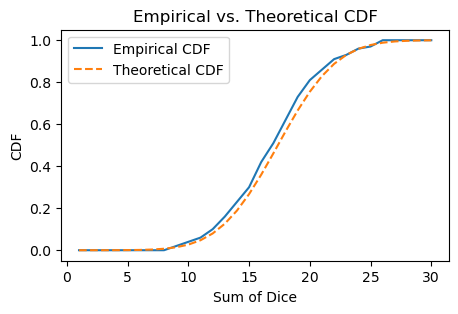

Maximum Offset at Each Level: [8.92162934e-06 2.81008324e-05 8.28977119e-05 2.29119586e-04
 5.93538725e-04 1.44178767e-03 3.28586753e-03 7.03017277e-03
 5.86916786e-03 1.32925821e-02 1.24877543e-02 2.03434990e-02
 3.39581332e-02 4.14412381e-02 3.27451830e-02 6.02225594e-02
 4.86251767e-02 5.44277930e-02 6.46185293e-02 5.53240557e-02
 3.07104763e-02 2.24799763e-02 3.53974705e-05 1.13973650e-03
 7.23331485e-03 1.18556068e-02 5.80371454e-03 2.66861621e-03
 1.15175146e-03 4.66298832e-04]
Average of Maximum Offsets: 0.017986698909661578


In [196]:
dice_sum = df.sum(axis=1)

#Create an array of x values for testing (1 to 30)
x_values = np.arange(1, 31)

#Calculate empirical CDF using NumPy
empirical_cdf = np.array([(dice_sum <= x).mean() for x in x_values])

#Calculate theoretical CDF based on Central Limit Theorem
""" Using scipy's 'erf' function "The cumulative of the unit normal distribution is given by Phi(z) = 1/2[1 + erf(z/sqrt(2))]".
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.erf.html """
z_values = (x_values - dice_sum.mean()) / dice_sum.std()
theoretical_cdf = 0.5 * (1 + erf(z_values / np.sqrt(2))) 

#Calculate maximum offset (absolute difference) at each level
max_offsets = np.abs(empirical_cdf - theoretical_cdf)

#Calculate average of these maximum offsets
average_offset = np.mean(max_offsets)

#Plot the empirical and theoretical CDF
plt.figure(figsize=(5, 3))
plt.plot(x_values, empirical_cdf, label="Empirical CDF")
plt.plot(x_values, theoretical_cdf, label="Theoretical CDF", linestyle='--')
plt.xlabel("Sum of Dice")
plt.ylabel("CDF")
plt.legend()
plt.title("Empirical vs. Theoretical CDF")
plt.show()

print("Maximum Offset at Each Level:", max_offsets)
print("Average of Maximum Offsets:", average_offset)

### 7.	Did the answers to six behave as you expected?  Why or why not?

The results of question six did align with my expectations. As I output the cumulative distribution functions (CDFs) and maximum offsets, I observed that the CDFs converged to a shape consistent with the Central Limit Theorem as described in your lecture and very similar visually to some of the slides in the "usages of pdf and cdf in computing" section. This made me feel confident in my analysis overall. in terms of how closely the empirical and the theoretical tracked, I expected some error or difference between the two but did not expect there to be huge offsets between the two. The max offsets decreased as the sums of dice rolls increased, again confirming a convergence to a normal distribution. The Central Limit Theorem and the relatively large sample size in the dataset were the key guides to my assumptions for question 6: Max offset at each level/test would be small and even smaller as the sum of dice rolls increased (this was a simple way for me to simulate increasing number of die in each roll) and the results would converge to a Gaussian/normal distribution.